# Multiple Linear Regression
##### We aim to predict students’ final scores using their class attendance, hours studied per week and sleep hours.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import kagglehub

e:\project\practice\myvenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Define dataset

In [11]:
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
df = pd.read_csv(path + r"/StudentPerformanceFactors.csv")

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [13]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [14]:
df.dropna()
df.shape

(6607, 20)

In [15]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Preprocessing

In [21]:
cdf = df[["Hours_Studied", "Attendance", "Sleep_Hours", "Exam_Score"]]

cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours_Studied  6607 non-null   int64
 1   Attendance     6607 non-null   int64
 2   Sleep_Hours    6607 non-null   int64
 3   Exam_Score     6607 non-null   int64
dtypes: int64(4)
memory usage: 206.6 KB


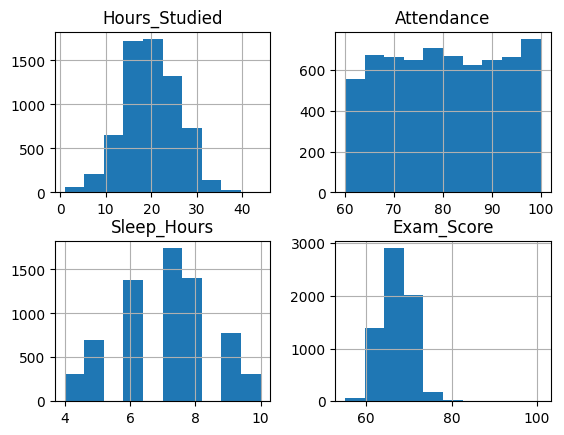

In [22]:
vis = cdf[["Hours_Studied", "Attendance", "Sleep_Hours", "Exam_Score"]]
vis.hist()
plt.show()

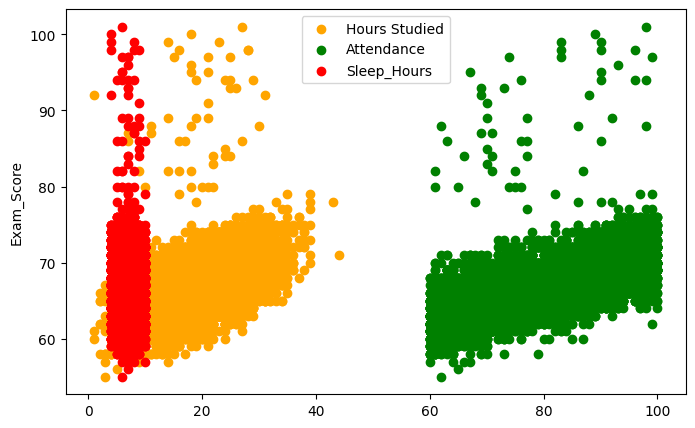

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(cdf["Hours_Studied"], cdf["Exam_Score"], color="orange", label="Hours Studied")
plt.scatter(cdf["Attendance"], cdf["Exam_Score"], color="green", label="Attendance")
plt.scatter(cdf["Sleep_Hours"], cdf["Exam_Score"], color="red", label="Sleep_Hours")
plt.legend(loc="best")
plt.ylabel("Exam_Score")
plt.show()

In [24]:
cdf = cdf.copy()
cdf.drop("Sleep_Hours", axis=1, inplace=True)

cdf.head(0)

,Hours_Studied,Attendance,Exam_Score


In [25]:
msk = np.random.rand(len(df)) < 0.8
train, test = cdf[msk], cdf[~msk]

train.shape, test.shape

((5293, 3), (1314, 3))

### Model definition

In [ ]:
mymodel = LinearRegression()

x_train = np.asanyarray(train[["Hours_Studied", "Attendance"]])
y_train = np.asanyarray(train[["Exam_Score"]])

mymodel.fit(x_train, y_train)

print(f"coefficient : {mymodel.coef_[0][0]:.5f} and {mymodel.coef_[0][1]:.5f} | intercept : {mymodel.intercept_[0]:.5f}")

coefficient : 0.29796 and 0.19679 | intercept : 45.51566


### Model evaluation

In [27]:
x_test = np.asanyarray(test[["Hours_Studied", "Attendance"]])
y_test = np.asanyarray(test[["Exam_Score"]])

y_pred = mymodel.predict(x_test)

In [28]:
mse = np.mean((y_test - y_pred) ** 2)
mae = np.mean(np.absolute(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"mean squared error : {mse}| mean absolute error : {mae}| r2 score : {r2}".title())

Mean Squared Error : 9.279377921645786| Mean Absolute Error : 1.6046669552453308| R2 Score : 0.4496168053965671


In [38]:
mymodel.predict([[23, 84]])

array([[68.90847153]])